## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merged_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse = merged_mouse_df.loc[merged_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = merged_mouse_df.loc[merged_mouse_df["Mouse ID"] == "g989",:]
all_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = merged_mouse_df.drop(labels = [908,909,910,911,912,913,914,915,916,917,918,919,920], axis = 0)
cleaned_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_count = merged_mouse_df["Mouse ID"].unique()
total_mice = len(mouse_count)
total_mice

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Mean tumor volume
mean_tumor = cleaned_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# Median Tumor Volume
median_tumor = cleaned_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# Variance of Tumor Volume
variance_tumor = cleaned_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# Standard Deviation of Tumor Volume
std_tumor = cleaned_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# SEM of Tumor Volume
sem_tumor = cleaned_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



In [7]:
tumor_vol_df = pd.DataFrame({
    "Mean" : mean_tumor,
    "Median": median_tumor,
    "Variance": variance_tumor,
    "Standard Deviation": std_tumor,
    "SEM": sem_tumor
    
    
})
tumor_vol_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_vol_df = cleaned_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
agg_tumor_vol_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Sum of Timepoints')

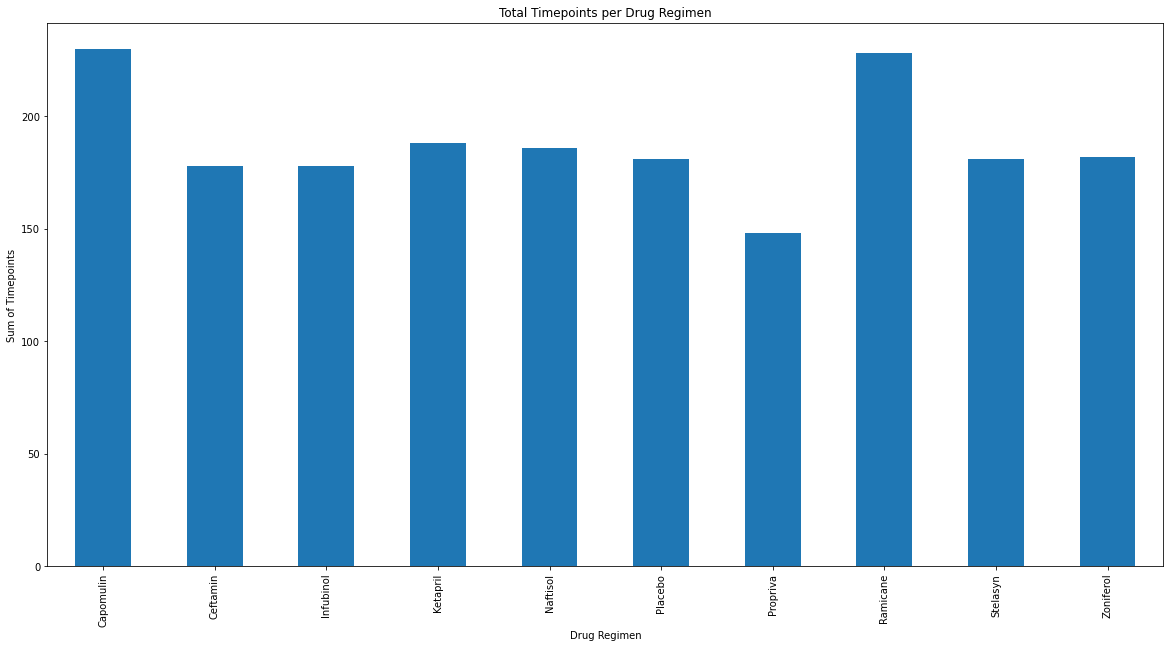

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
p_drug_df = cleaned_mouse_df.groupby(["Drug Regimen"]).count()["Timepoint"]
p_drug_df.plot(kind = "bar", figsize = (20,10))
plt.title("Total Timepoints per Drug Regimen")
plt.ylabel("Sum of Timepoints")


Text(0, 0.5, 'Sum of Timepoints')

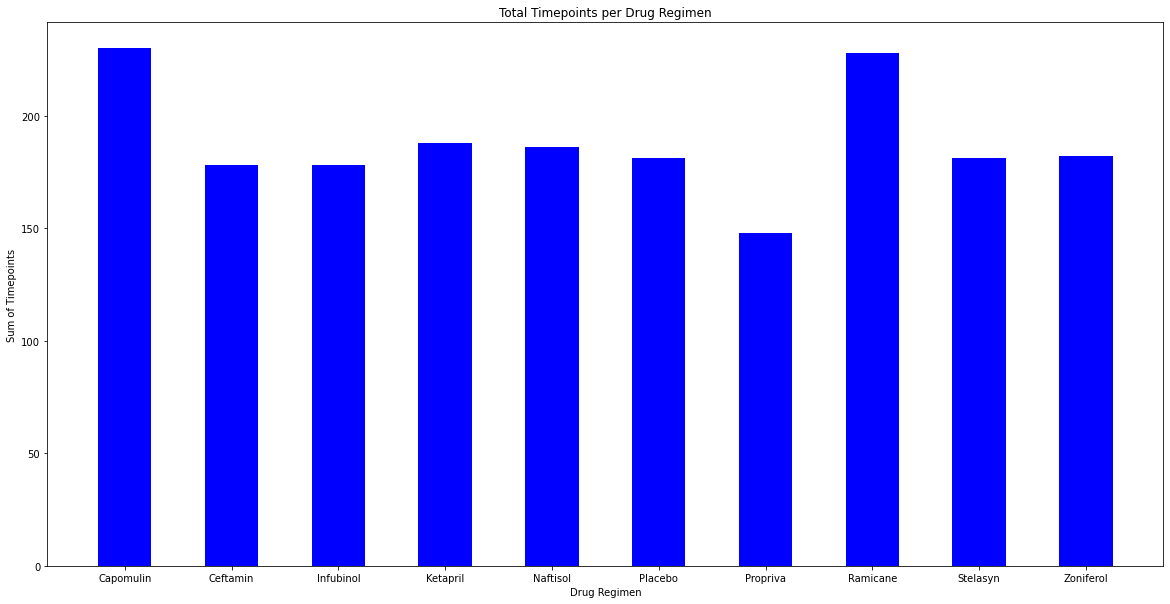

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(20,10))

x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
y_axis = cleaned_mouse_df.groupby(["Drug Regimen"]).count()["Timepoint"]

m_drug_df = plt.bar(x_axis, y_axis, width = 0.5, color = 'blue', alpha = 1, align = "center")
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Sum of Timepoints")

Text(0.5, 1.0, 'Distribution of Mouse Gender in the Study')

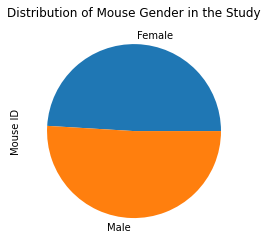

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
p_gender_df = cleaned_mouse_df.groupby(["Sex"]).count()["Mouse ID"]
p_gender_df.plot(kind = "pie", subplots=True)

plt.title("Distribution of Mouse Gender in the Study")

Text(0.5, 1.0, 'Distribution of Mouse Gender in the Study')

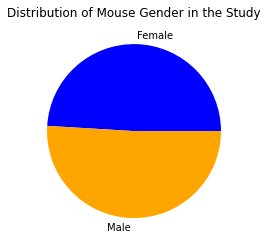

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
size = p_gender_df
colors = ["blue","orange"]
plt.pie(size, labels=labels, colors=colors)

plt.title("Distribution of Mouse Gender in the Study")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#index_mouse_df = cleaned_mouse_df.set_index("Mouse ID")
#max_timepoint = cleaned_mouse_df.loc[:,["Tumor Volume (mm3)", "Timepoint"]]
max_tumor = cleaned_mouse_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_tumor_df = max_tumor.merge(cleaned_mouse_df,on=['Mouse ID','Timepoint'],how="left")
treatment_tumor_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = treatment_tumor_df.loc[treatment_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\artsy\AppData\Local\Temp/ipykernel_94632/4287612574.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  bxp1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


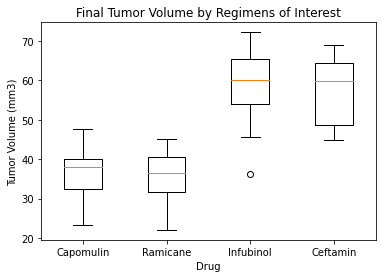

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, bxp1 = plt.subplots()
bxp1.set_title('Final Tumor Volume by Regimens of Interest')
bxp1.set_xlabel("Drug")
bxp1.set_ylabel("Tumor Volume (mm3)")
bxp1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
bxp1.boxplot(tumor_data)
plt.show()

## Line and Scatter Plots

In [16]:
# Organize the mice by Mouse ID and find mice who used Capomulin
drug_mouse_df = cleaned_mouse_df.set_index("Mouse ID")
cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == "Capomulin",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


What mouse would you like to see?s185


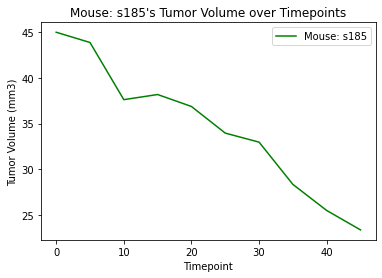

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = input("What mouse would you like to see?")
one_tumor_vol = drug_mouse_df.loc[capomulin_mouse,["Tumor Volume (mm3)"]]
one_timepoint = drug_mouse_df.loc[capomulin_mouse,["Timepoint"]]
plt.plot(one_timepoint, one_tumor_vol, color = 'green', label = f"Mouse: {capomulin_mouse}")

# Chart Details
plt.legend(loc="best")
plt.title("Mouse: " + capomulin_mouse + "'s Tumor Volume over Timepoints")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

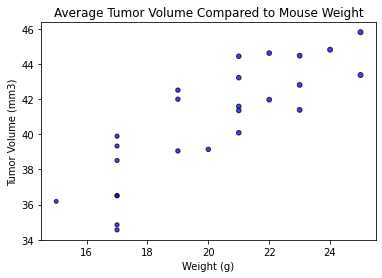

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Average tumor values for Capomulin
all_avg_tumor = cleaned_mouse_df.groupby(["Drug Regimen", "Mouse ID"]).mean()
c_avg_tumor = all_avg_tumor.loc[["Capomulin"], ["Tumor Volume (mm3)"]]

# Mouse Weight for Capomulin
all_weight = (cleaned_mouse_df.groupby(["Drug Regimen", "Mouse ID"]).mean() * (cleaned_mouse_df.groupby(["Drug Regimen", "Mouse ID"]).count()))/ cleaned_mouse_df.groupby(["Drug Regimen", "Mouse ID"]).count()
c_weight = all_weight.loc[["Capomulin"], ["Weight (g)"]]

# Plot on Scatter Plot
plt.scatter(c_weight, c_avg_tumor, marker = "o", facecolors = "blue", edgecolors = "black", s = c_weight, alpha = 0.75)

plt.title("Average Tumor Volume Compared to Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


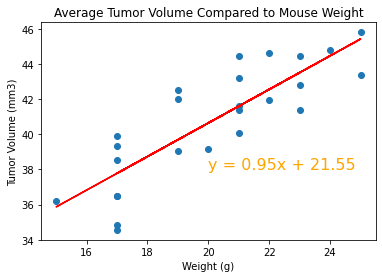

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Create Series to Use for Correlation and Regression
c_array_tumor = all_avg_tumor.iloc[0:25,3]
c_array_weight = all_weight.iloc[0:25, 5]

# Calculate and Print Correlation
correlation = st.pearsonr(c_array_weight, c_array_tumor)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(c_array_weight, c_array_tumor)
mouse_regress = c_array_weight * slope + intercept
w_t_eq  = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(c_array_weight, c_array_tumor)
plt.plot(c_array_weight, mouse_regress, "r-")
plt.annotate(w_t_eq, (20,38), fontsize=16, color="orange")

plt.title("Average Tumor Volume Compared to Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()